In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# -----------------------------
# Algorithm 5: Poisson Random Variable Generation (Inverse Transform)
# -----------------------------
def generate_poisson_rv(lambda_):
    """
    Generate a single Poisson random variable using inverse transform,
    counting the number of comparisons.
    """
    U = np.random.uniform(0, 1)
    i = 0
    p = np.exp(-lambda_)
    F = p
    comparisons = 1  # First comparison with F
    
    while U >= F:
        i += 1
        p = (lambda_ * p) / i
        F += p
        comparisons += 1
    
    return i, comparisons

# -----------------------------
# Algorithm 6: Efficient Poisson Random Variable Generator
# -----------------------------
def generate_poisson_efficient(lam):
    """
    Generate a single Poisson random variable using search near lambda,
    counting comparisons.
    """
    I = int(lam)
    
    # Compute p_0 to p_I
    p = np.zeros(I+1)
    p[0] = np.exp(-lam)
    for k in range(1, I+1):
        p[k] = lam * p[k-1] / k
    F_I = np.sum(p)
    
    # Draw uniform random number
    U = np.random.uniform(0,1)
    comparisons = 1  # Initial comparison with F_I
    
    if U <= F_I:
        i = I
        F = F_I
        while U < F:
            i -= 1
            if i < 0:
                break
            p_i = p[i+1] * (i+1) / lam
            F -= p_i
            comparisons += 1
        X = i + 1
    else:
        i = I + 1
        F = F_I
        p_prev = p[-1]
        while U > F:
            p_i = lam * p_prev / i
            F += p_i
            p_prev = p_i
            i += 1
            comparisons += 1
        X = i - 1
    
    return X, comparisons

# -----------------------------
# Generate multiple Poisson samples with comparison counts
# -----------------------------
def generate_poisson_samples(lambda_, n_samples=1000, type='Standard'):
    """
    Generate multiple Poisson samples and record number of comparisons.
    
    Returns:
        samples : np.array of generated Poisson random variables
        comparisons : np.array of number of comparisons per sample
    """
    samples = []
    comparisons_list = []
    
    if type == 'Standard':
        for _ in range(n_samples):
            x, c = generate_poisson_rv(lambda_)
            samples.append(x)
            comparisons_list.append(c)
    else:
        for _ in range(n_samples):
            x, c = generate_poisson_efficient(lambda_)
            samples.append(x)
            comparisons_list.append(c)
            
    return np.array(samples), np.array(comparisons_list)


def plot_discrete_samples(samples, outcomes=None, title_prefix=''):
    """
    Plot PMF (as histogram) and CDF of generated discrete samples.

    Parameters:
        samples : np.array
            Array of generated discrete samples
        outcomes : list or np.array, optional
            Original outcomes to preserve order in plots. If None, uses sorted unique values.
        title_prefix : str
            Prefix for plot titles (e.g., 'Efficient', 'Standard')
    """
    if outcomes is None:
        outcomes = np.sort(np.unique(samples))
    
    # Compute PMF
    pmf = np.array([np.mean(samples == x) for x in outcomes])
    
    # Completely remove outcome 0
    mask = outcomes != 0
    outcomes_filtered = outcomes[mask]
    pmf_filtered = pmf[mask]
    
    # Compute CDF
    cdf_filtered = np.cumsum(pmf_filtered)
    
    plt.figure(figsize=(12,5))
    
    # PMF as histogram
    plt.subplot(1,2,1)
    plt.bar(outcomes_filtered, pmf_filtered, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'{title_prefix} PMF')
    plt.xlabel('Outcome')
    plt.ylabel('Probability')
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # CDF as step plot
    plt.subplot(1,2,2)
    plt.step(outcomes_filtered, cdf_filtered, where='mid', color='black')
    plt.title(f'{title_prefix} CDF')
    plt.xlabel('Outcome')
    plt.ylabel('Cumulative Probability')
    plt.grid(True, linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()



Generating Poisson samples with lambda = 1
Average comparisons (Standard): 2.02


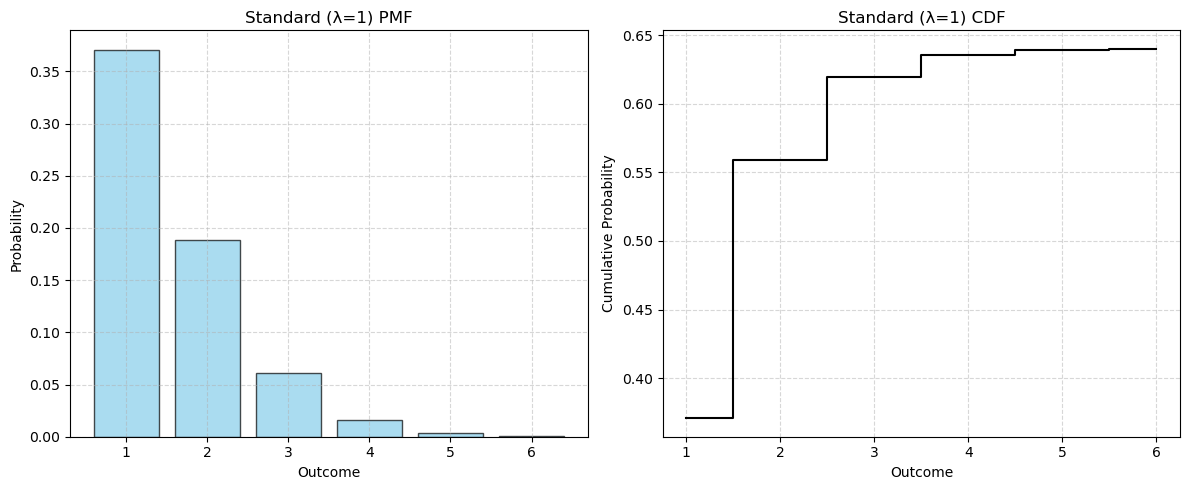

Average comparisons (Efficient): 2.10


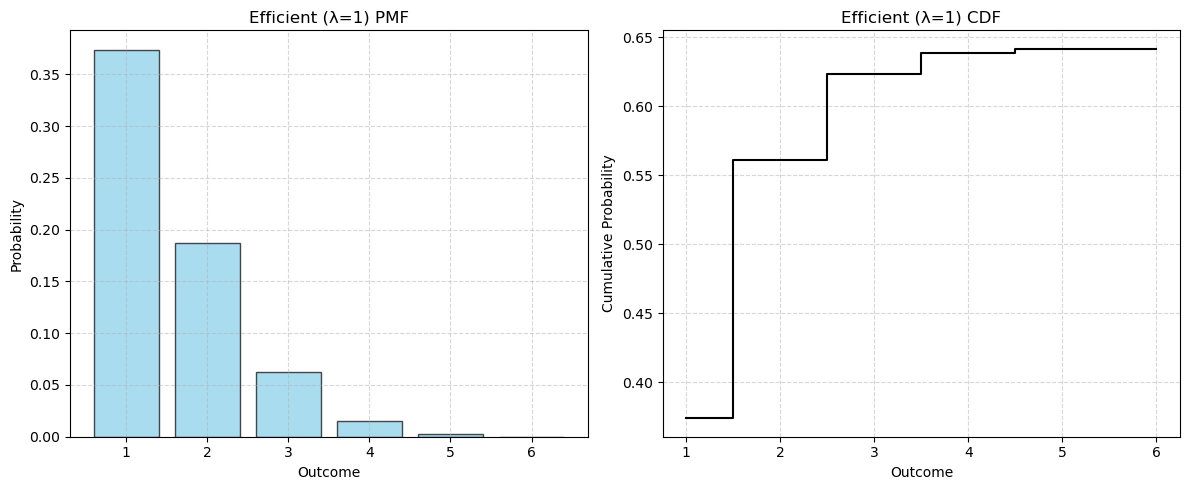


Generating Poisson samples with lambda = 2
Average comparisons (Standard): 2.98


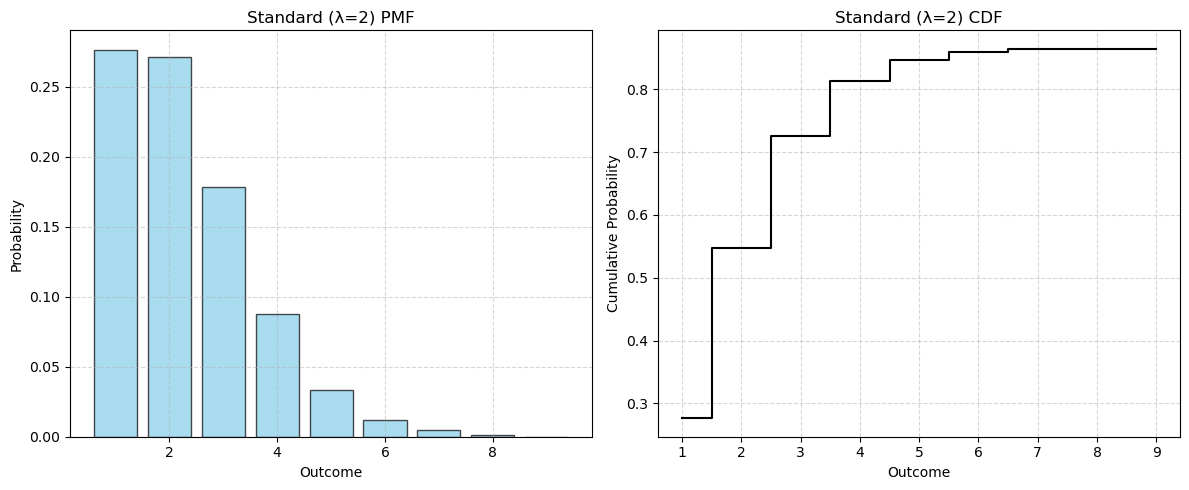

Average comparisons (Efficient): 2.63


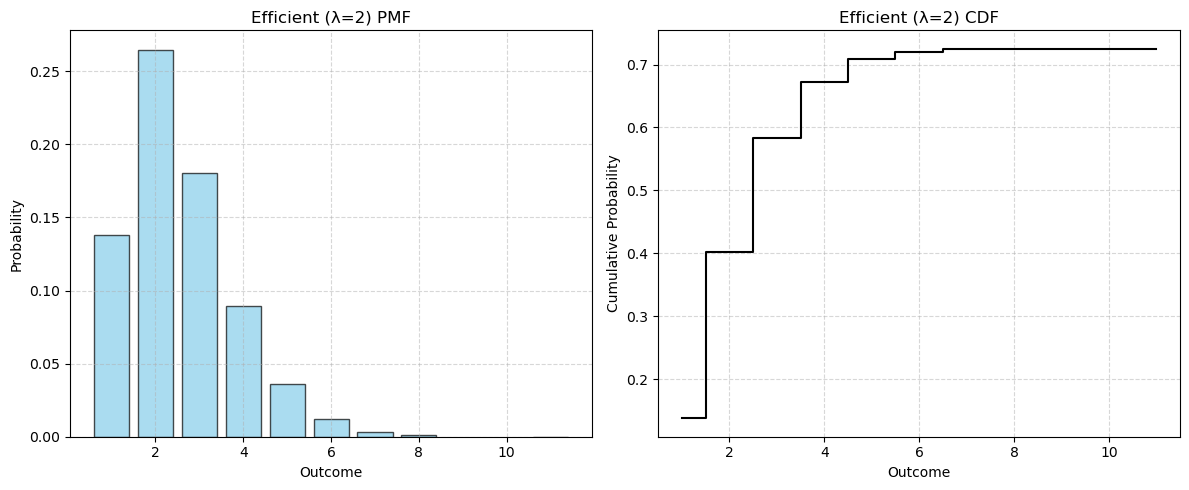


Generating Poisson samples with lambda = 5
Average comparisons (Standard): 5.96


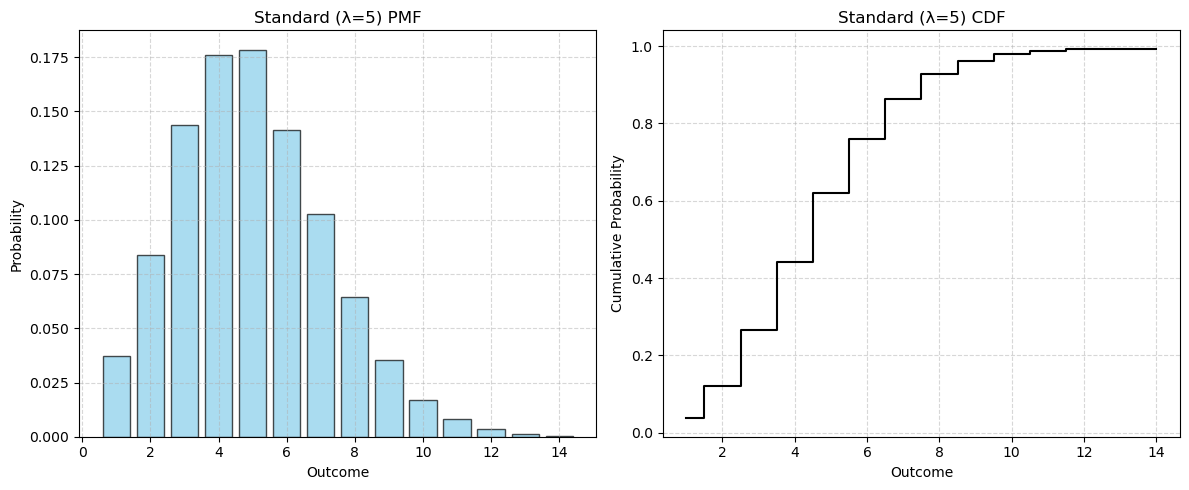

Average comparisons (Efficient): 3.61


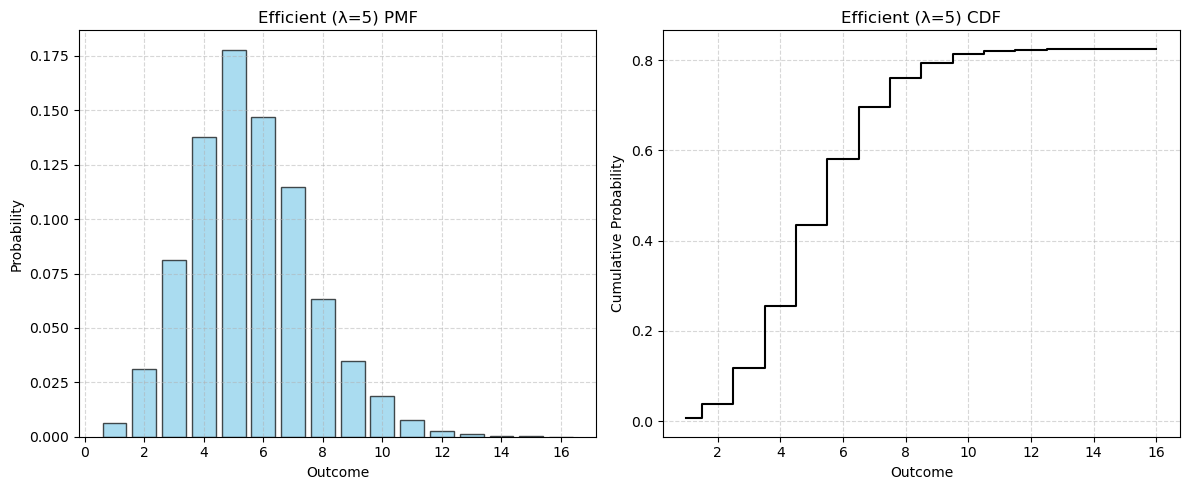


Generating Poisson samples with lambda = 10
Average comparisons (Standard): 11.00


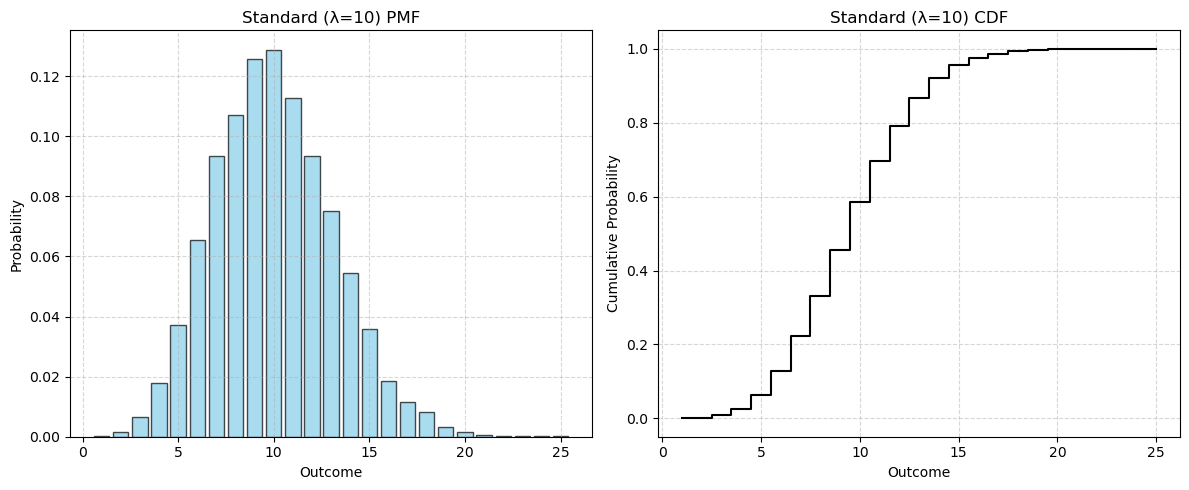

Average comparisons (Efficient): 4.77


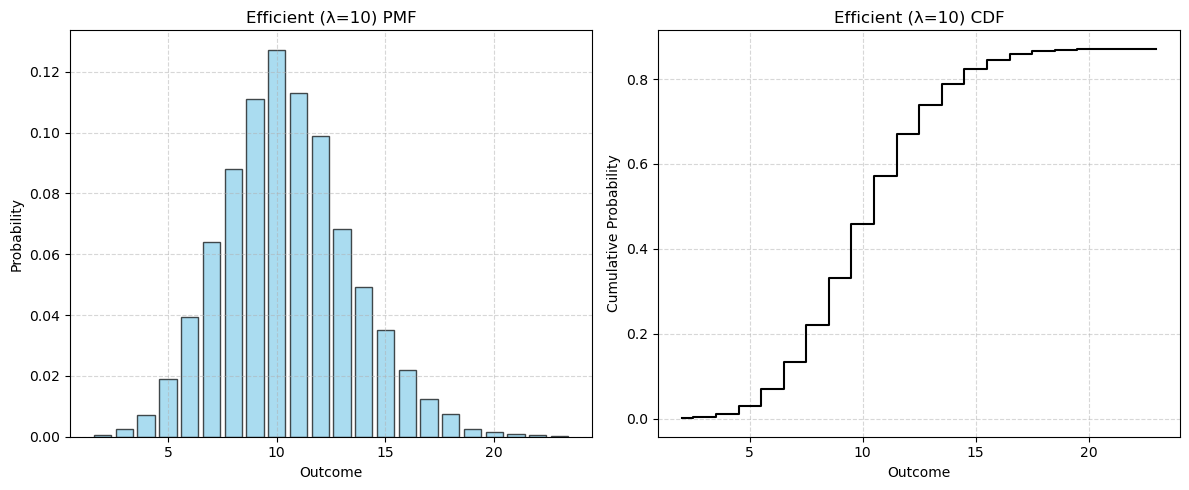


Generating Poisson samples with lambda = 20
Average comparisons (Standard): 21.01


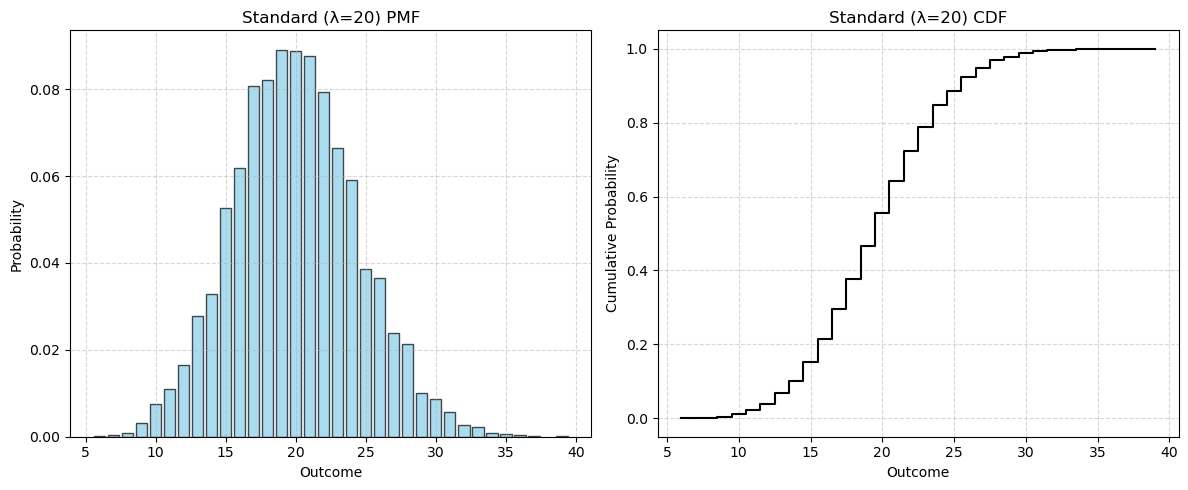

Average comparisons (Efficient): 6.26


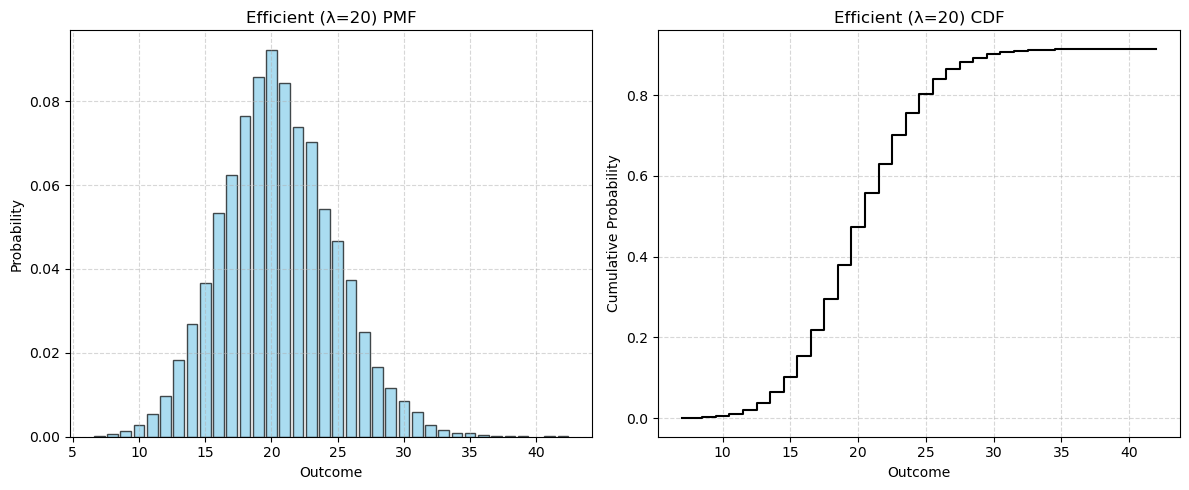


Generating Poisson samples with lambda = 50
Average comparisons (Standard): 51.00


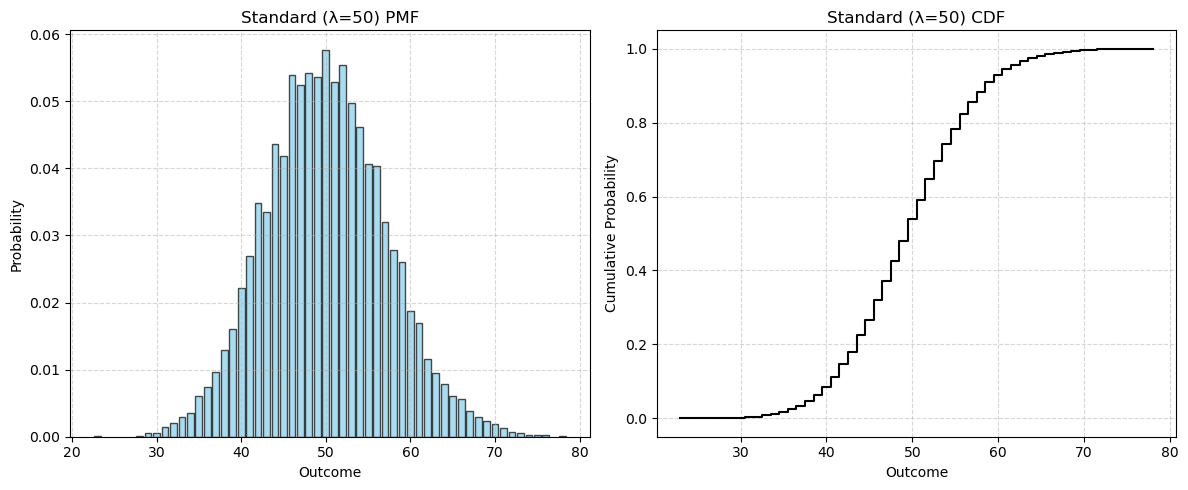

Average comparisons (Efficient): 9.39


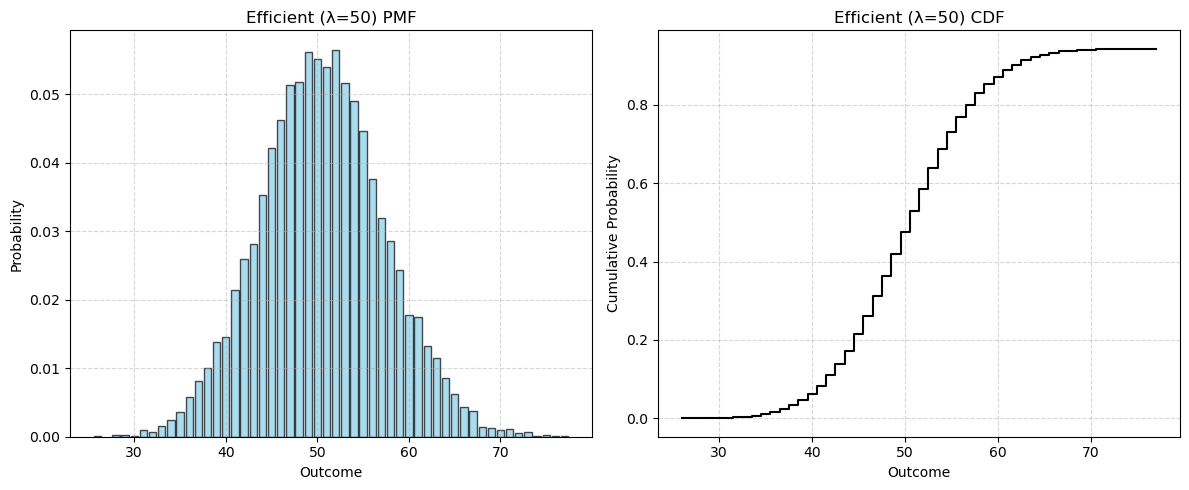


Generating Poisson samples with lambda = 100
Average comparisons (Standard): 100.93


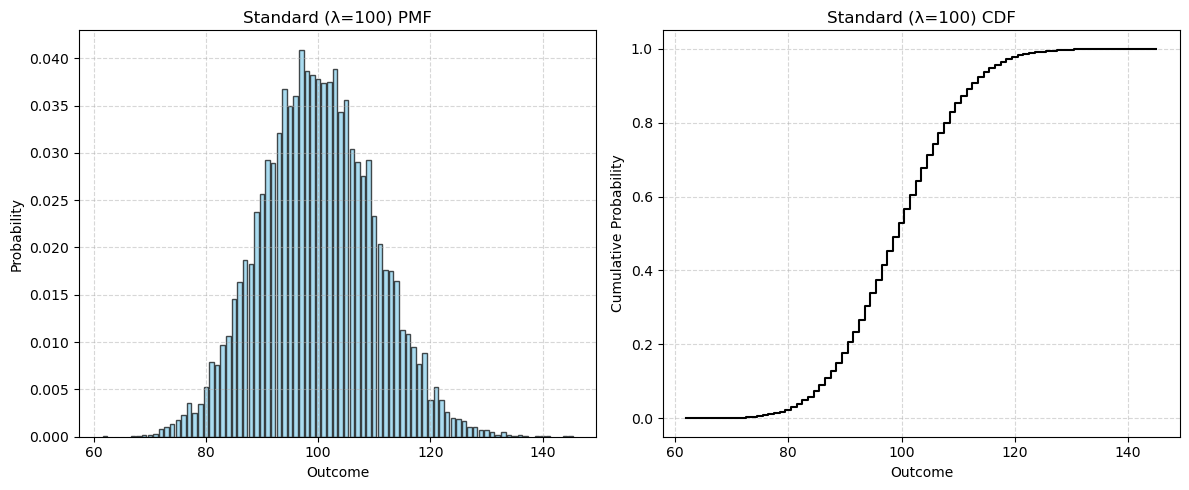

Average comparisons (Efficient): 12.74


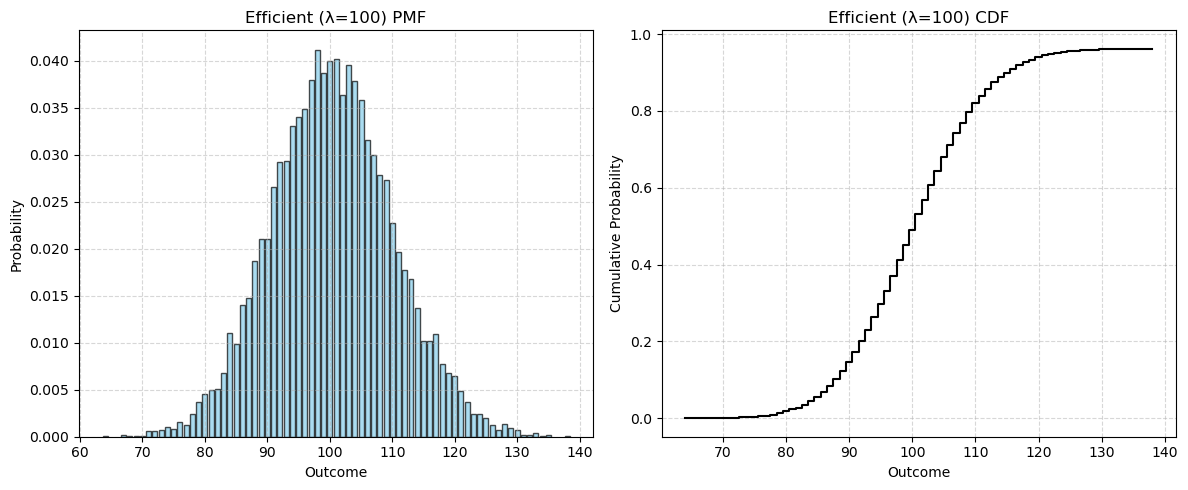


Generating Poisson samples with lambda = 200
Average comparisons (Standard): 201.24


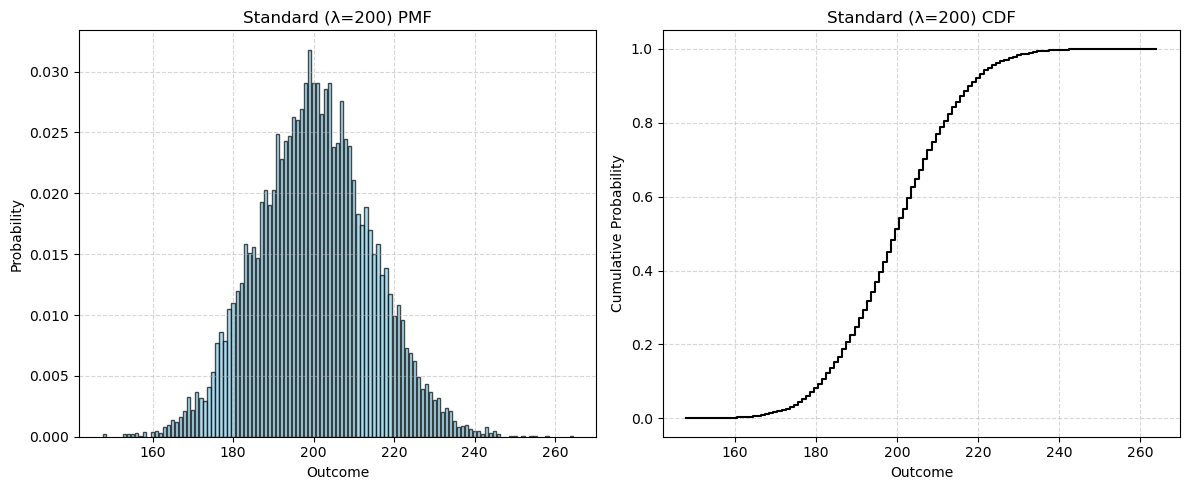

Average comparisons (Efficient): 17.66


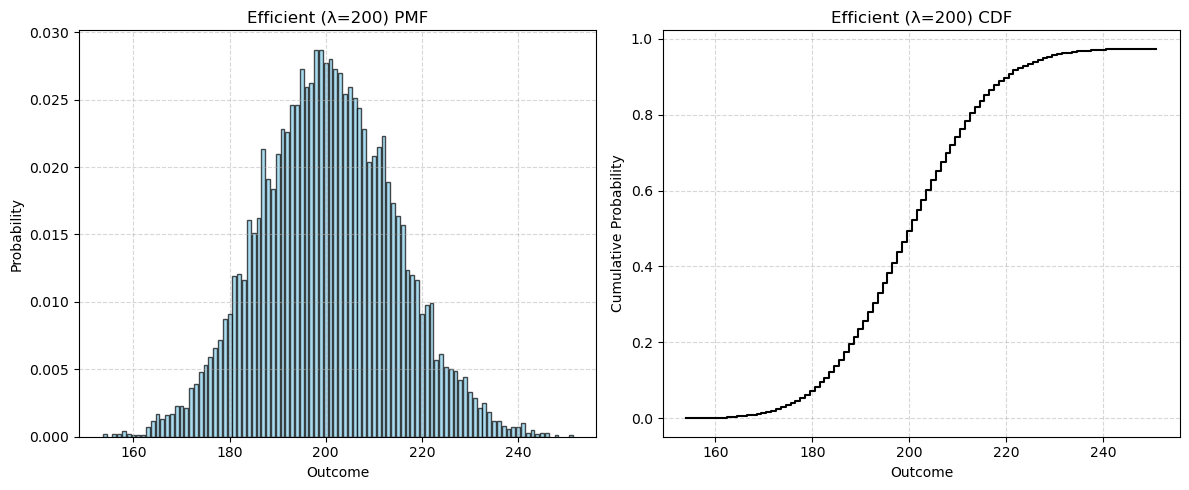


Generating Poisson samples with lambda = 500
Average comparisons (Standard): 501.43


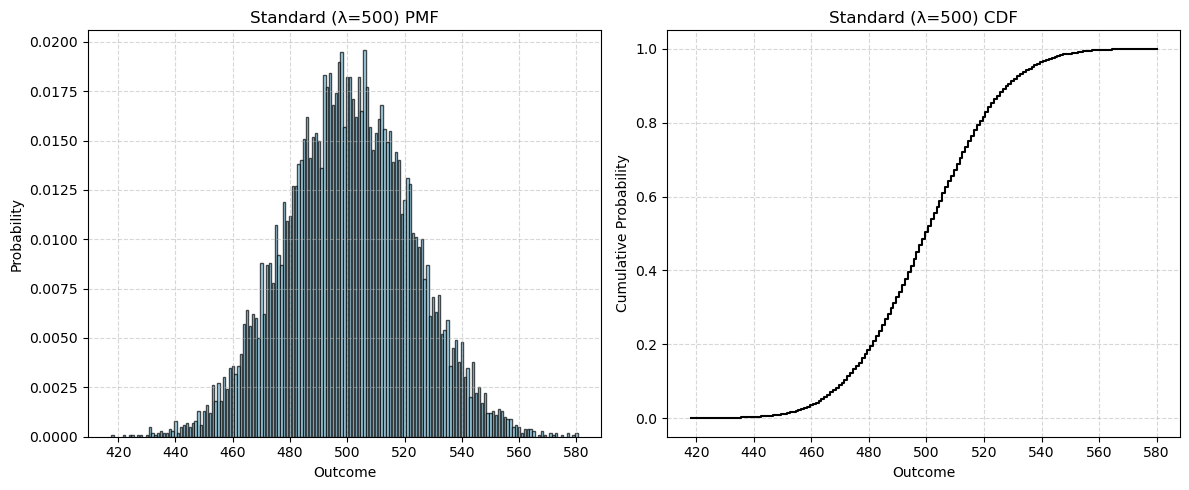

Average comparisons (Efficient): 27.46


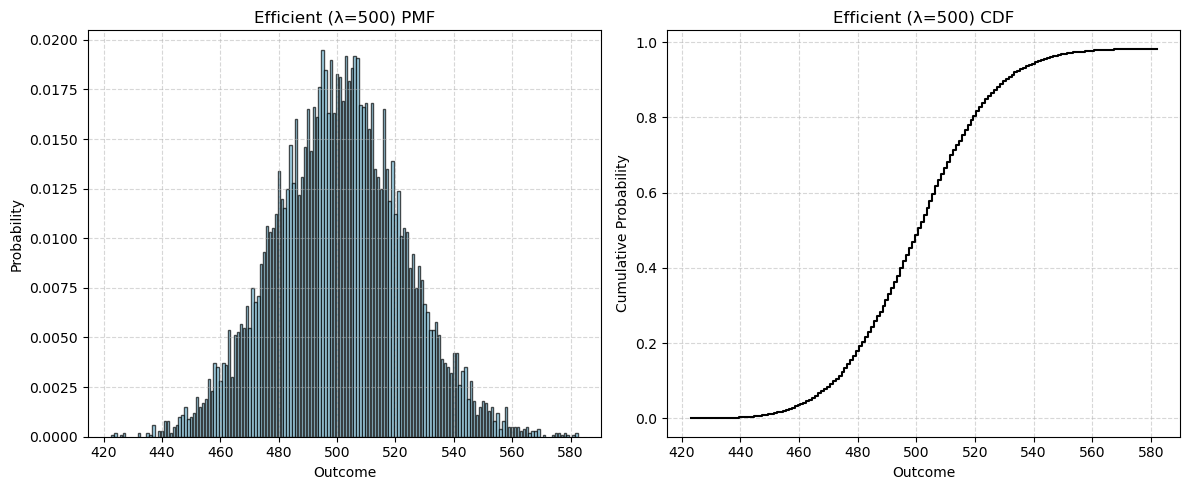

In [3]:
np.random.seed(32)
lambda_values = [1, 2, 5, 10, 20, 50, 100, 200, 500]
n_samples = 10000

# Loop over different lambda values
for lam in lambda_values:
    print(f"\nGenerating Poisson samples with lambda = {lam}")
    
    # -----------------------------
    # Standard algorithm
    # -----------------------------
    samples_std, comparisons_std = generate_poisson_samples(lam, n_samples=n_samples, type='Standard')
    avg_comp_std = np.mean(comparisons_std)
    print(f"Average comparisons (Standard): {avg_comp_std:.2f}")
    
    plot_discrete_samples(samples_std, title_prefix=f'Standard (λ={lam})')
    
    # -----------------------------
    # Efficient algorithm
    # -----------------------------
    samples_eff, comparisons_eff = generate_poisson_samples(lam, n_samples=n_samples, type='Efficient')
    avg_comp_eff = np.mean(comparisons_eff)
    print(f"Average comparisons (Efficient): {avg_comp_eff:.2f}")
    
    plot_discrete_samples(samples_eff, title_prefix=f'Efficient (λ={lam})')


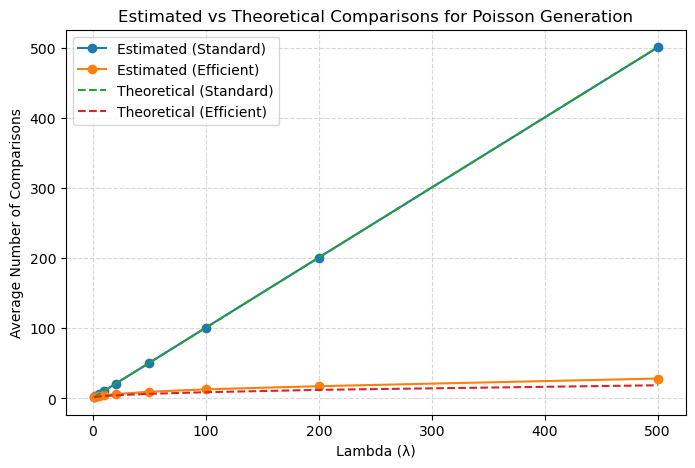

In [4]:
# Store results
avg_comp_std_list = []
avg_comp_eff_list = []

for lam in lambda_values:
    # Standard
    samples_std, comparisons_std = generate_poisson_samples(lam, n_samples=n_samples, type='Standard')
    avg_comp_std_list.append(np.mean(comparisons_std))
    
    # Efficient
    samples_eff, comparisons_eff = generate_poisson_samples(lam, n_samples=n_samples, type='Efficient')
    avg_comp_eff_list.append(np.mean(comparisons_eff))

# Convert to arrays
avg_comp_std_list = np.array(avg_comp_std_list)
avg_comp_eff_list = np.array(avg_comp_eff_list)
lambda_values = np.array(lambda_values)

# Theoretical comparisons
theo_std = 1 + lambda_values
theo_eff = 1 + np.sqrt(2/np.pi) * np.sqrt(lambda_values)

# Plot
plt.figure(figsize=(8,5))
plt.plot(lambda_values, avg_comp_std_list, 'o-', label='Estimated (Standard)')
plt.plot(lambda_values, avg_comp_eff_list, 'o-', label='Estimated (Efficient)')
plt.plot(lambda_values, theo_std, '--', label='Theoretical (Standard)')
plt.plot(lambda_values, theo_eff, '--', label='Theoretical (Efficient)')
plt.xlabel('Lambda (λ)')
plt.ylabel('Average Number of Comparisons')
plt.title('Estimated vs Theoretical Comparisons for Poisson Generation')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()